# Training MNIST with Histogram of Oriented Gradient (HOG) Features

In [1]:
import os
import gzip
import pickle
import numpy as np
from skimage.feature import hog
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier

### MNIST Dataset
MNIST Dataset consists of 60000 images of hand written digits from 0-9. It is split into a traning set consisting of 50000 images and a test set consisting of 10000 images. Each image is a grayscale image with a dimension of 28 x 28.

In [2]:
# image size and the number of training and testing samples
image_size = 28
num_train = 50000
num_test = 10000

In [3]:
# Read the training data
f = gzip.open(os.path.join('data', 'train-images-idx3-ubyte.gz'),'r')
f.read(16)
buf = f.read(image_size * image_size * num_train)
train_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
train_data = train_data.reshape(num_train, image_size, image_size)
f.close()

In [4]:
# Read the testing data
f = gzip.open(os.path.join('data', 't10k-images-idx3-ubyte.gz'),'r')
f.read(16)
buf = f.read(image_size * image_size * num_test)
test_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
test_data = test_data.reshape(num_test, image_size, image_size)
f.close()

In [5]:
# Read the training labels
f = gzip.open(os.path.join('data', 'train-labels-idx1-ubyte.gz'),'r')
f.read(8)
buf = f.read(num_train)
train_labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
train_labels = train_labels.reshape(num_train, )
f.close()

In [6]:
# Read the test labels
f = gzip.open(os.path.join('data', 't10k-labels-idx1-ubyte.gz'),'r')
f.read(8)
buf = f.read(num_test)
test_labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
test_labels = test_labels.reshape(num_test,)
f.close()

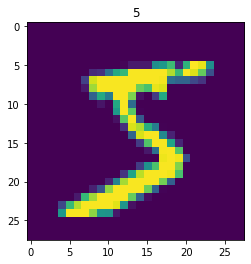

In [7]:
# Display the first sample from the training data
image = np.asarray(train_data[0]).squeeze()
plt.imshow(image)
plt.title(train_labels[0])
plt.show()

### Histogram of Oriented Gradients (HOG)
The histogram of oriented gradients (HOG) is a feature descriptor used in computer vision and image processing for the purpose of object detection and image classification. The technique counts occurrences of gradient orientation in localized portions of an image. 
#### Paper
https://lear.inrialpes.fr/people/triggs/pubs/Dalal-cvpr05.pdf 
#### References 
* https://www.learnopencv.com/histogram-of-oriented-gradients/
* https://en.wikipedia.org/wiki/Histogram_of_oriented_gradients

In [8]:
# Extract HOG features 
def extract_HOG_features(data):
    num_samples = data.shape[0]
    hog_features = []
    for i in range(num_samples):
        img = data[i]
        feature = hog(img, orientations=9, pixels_per_cell=(4, 4), cells_per_block=(3, 3))
        hog_features.append(feature)
    return np.array(hog_features)

In [9]:
train_features = extract_HOG_features(train_data)
test_features = extract_HOG_features(test_data)
test_features[0].shape

(2025,)

In [10]:
clf = MLPClassifier(solver='adam', 
                    activation='relu', 
                    alpha=.001, 
                    hidden_layer_sizes=(512, 128, 10), 
                    random_state=1, 
                    max_iter=500)

In [11]:
clf.fit(train_features, train_labels)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(512, 128, 10), max_iter=500,
              random_state=1)

In [12]:
pred = clf.predict(train_features)
train_accuracy = np.mean(pred == train_labels)

In [13]:
pred = clf.predict(test_features)
test_accuracy = np.mean(pred == test_labels)

In [14]:
print("Training accuracy: {}".format(train_accuracy))
print("Testing accuracy: {}".format(test_accuracy))

Training accuracy: 0.99956
Testing accuracy: 0.9864


In [15]:
num_wrong_cls = np.sum(pred != test_labels)
print("Number of images incorrectly classified: {}".format(num_wrong_cls))

Number of images incorrectly classified: 136


In [16]:
# Save the weights file to disc
pickle.dump(clf, open("mnist_hog_fc.sav", 'wb'))

In [34]:
incorrect_pred = pred != test_labels
incorrect_idx = np.where(incorrect_pred == True)
top_five = incorrect_idx[0][:5]

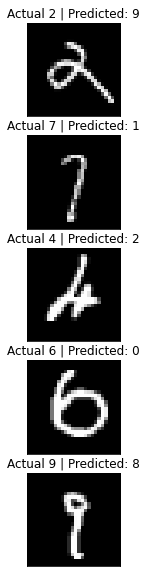

In [48]:
plt.figure(figsize = (10, 10))
for i, idx in enumerate(top_five):
    plt.subplot(5,1,i + 1),plt.imshow(test_data[idx],cmap = 'gray')
    plt.title('Actual {} | Predicted: {}'.format(test_labels[idx], pred[idx])), plt.xticks([]), plt.yticks([])
plt.show()